#**Part1**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("StudentSummerProgramData_Numeric_3_cont.csv")
df.head()

In [ ]:
x1 = df['TestScore']
x2 = df['WritingScore']
y = df['GPA']
x1 =(x1 -x1.mean())/ x1.std()
x2 =(x2 -x2.mean())/ x2.std()
x = np.c_[x1,x2,np.ones(x1.shape[0])]

In [ ]:
learning_rate = 0.01
epochs = 500
N = y.size
np.random.seed(123)
coeff = np.random.rand(3)
print("The initial values of the coefficient ie the weights are", coeff)
def gradient_descent(x,y,coeff,epochs,learning_rate):
  past_costs =[]
  past_coeff =[coeff]
  for i in range(epochs):
    prediction = np.dot(x, coeff)
    error = prediction - y
    cost = 1/(2*N) * np.dot(error.T,error)
    past_costs.append(cost)
    der = (1/N) * learning_rate * np.dot(x.T, error)
    coeff = coeff - der
    past_coeff.append(coeff)
  return past_coeff, past_costs

past_coeff, past_costs = gradient_descent(x,y,coeff,epochs,learning_rate)
coeff = past_coeff[-1]

print("Final value of coefficients", coeff)




The initial values of the coefficient ie the weights are [0.69646919 0.28613933 0.22685145]
Final value of coefficients [0.26918315 0.01646648 3.50766597]


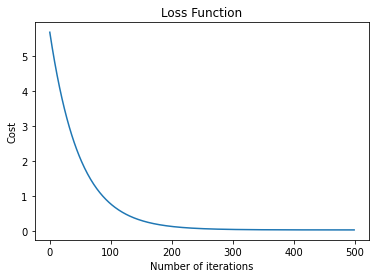

In [ ]:
plt.title("Loss Function")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.plot(past_costs)
plt.show()

#**Part2**

In [ ]:
y_binary=[]
for i in y:
  if i >= 2.9:
    i=1
    y_binary.append(i)
  else:
    i=0
    y_binary.append(i)
print(y_binary)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1]


In [ ]:
df['Outcome'] = y_binary
df.drop(labels=['GPA'], axis=1, inplace =True)

In [ ]:
df.head()

,TestScore,WritingScore,Outcome
0,962,100,1
1,969,97,1
2,970,98,1
3,969,97,1
4,969,95,1


In [ ]:
#Looking at unique values
df['Outcome'].unique()

array([1, 0])

In [ ]:
X = df.loc[:,['TestScore', 'WritingScore']]
Y = df.loc[:,['Outcome']]

In [ ]:
print(X.shape, Y.shape)

(63, 2) (63, 1)


In [ ]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim =2, activation ="sigmoid"))

In [ ]:
model.compile(loss ="binary_crossentropy" , optimizer ='rmsprop', metrics = ['accuracy'])

In [ ]:
history = model.fit(X,Y, epochs = 1000 , verbose =1)

Epoch 1/1000
2/2 [==============================] - 0s 6ms/step - loss: 350.8152 - accuracy: 0.0635
Epoch 2/1000
2/2 [==============================] - 0s 7ms/step - loss: 346.3824 - accuracy: 0.0635
Epoch 3/1000
2/2 [==============================] - 0s 6ms/step - loss: 343.2227 - accuracy: 0.0635
Epoch 4/1000
2/2 [==============================] - 0s 5ms/step - loss: 340.5417 - accuracy: 0.0635
Epoch 5/1000
2/2 [==============================] - 0s 6ms/step - loss: 338.1161 - accuracy: 0.0635
Epoch 6/1000
2/2 [==============================] - 0s 6ms/step - loss: 335.8509 - accuracy: 0.0635
Epoch 7/1000
2/2 [==============================] - 0s 5ms/step - loss: 333.6946 - accuracy: 0.0635
Epoch 8/1000
2/2 [==============================] - 0s 4ms/step - loss: 331.6208 - accuracy: 0.0635
Epoch 9/1000
2/2 [==============================] - 0s 5ms/step - loss: 329.5978 - accuracy: 0.0635
Epoch 10/1000
2/2 [==============================] - 0s 6ms/step - loss: 327.6147 - accuracy: 0.0635

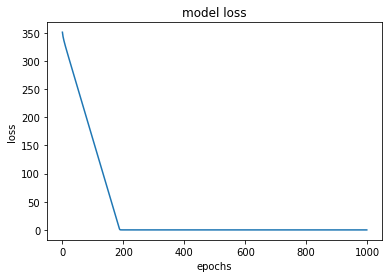

In [ ]:
#Plotting the loss function
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.plot(history.history['loss'])

In [ ]:
def sigmoid(x):
  return 1/(1+ np.exp(-x))


In [ ]:
def gradient_descent1(x,y,coeff,epochs,learning_rate):
  past_costs =[]
  past_coeff =[coeff]
  for i in range(epochs):
    prediction = sigmoid(np.dot(x, coeff))
    error = prediction - y
    cost = 1/(2*N) * np.dot(error.T,error)
    past_costs.append(cost)
    der = (1/N) * learning_rate * np.dot(x.T, error)
    coeff = coeff - der
    past_coeff.append(coeff)
  return past_coeff, past_costs

past_coeff, past_costs = gradient_descent1(x,y,coeff,epochs,learning_rate)
coeff = past_coeff[-1]

print("Final value of coefficients", coeff)

Final value of coefficients [ 2.96874122  1.74896201 28.78787164]


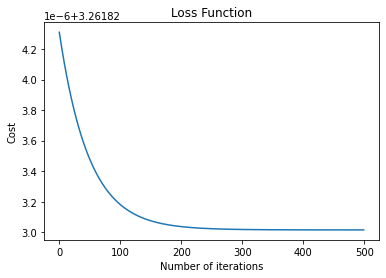

In [ ]:
plt.title("Loss Function")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.plot(past_costs)
plt.show()